#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Importing Dataset

Video Game Sales from 80s-2020

Link: https://www.kaggle.com/datasets/gregorut/videogamesales

In [2]:
vg = pd.read_csv('data/vgsales.csv', index_col=0)

#### Understanding the Structure of Data

In [3]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


There are 10 columns, which 6 of them are floating point (numbers) and can be use for statistical measure, while the other 4 are object (string).

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.

In [4]:
vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


head() tells the first 5 value inside of a dataframe

In [5]:
vg.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


tail() tells the last 5 values inside of a dataframe

In [6]:
vg.shape #rows, col

(16598, 10)

shape tells the numbers of rows and columns of a dataframe. 

From the shape above, we can infer that the dataset vgsales.csv have **16k rows and 10 columns**.

#### Check Null Values

In [7]:
vg.isnull()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16596,False,False,False,False,False,False,False,False,False,False
16597,False,False,False,False,False,False,False,False,False,False
16598,False,False,False,False,False,False,False,False,False,False


Based on the dataframe above, there are zero values that has null values. So we can proceed to do analysis without having to clean and drop the null values.

#### Check Duplicate Values

In [8]:
vg.duplicated()

Rank
1        False
2        False
3        False
4        False
5        False
         ...  
16596    False
16597    False
16598    False
16599    False
16600    False
Length: 16598, dtype: bool

Based on the duplicated() function above, the dataset does not have any duplicate values. Meaning that we do not have to change/drop anything on the dataset.

#### Categorical Analysis

In [11]:
vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [65]:
vg.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


YoY Average

In [10]:
vg.groupby(['Year']).mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,1.176667,0.074444,0.000000,0.013333,1.264444
1981.0,0.726087,0.042609,0.000000,0.006957,0.777609
1982.0,0.747778,0.045833,0.000000,0.008611,0.801667
1983.0,0.456471,0.047059,0.476471,0.008235,0.987647
1984.0,2.377143,0.150000,1.019286,0.050000,3.597143
1985.0,2.409286,0.338571,1.040000,0.065714,3.852857
1986.0,0.595238,0.135238,0.943333,0.091905,1.765238
1987.0,0.528750,0.088125,0.726875,0.012500,1.358750
1988.0,1.591333,0.439333,1.050667,0.066000,3.148000


YoY Median

In [63]:
vg.groupby(['Year']).median()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,0.720,0.040,0.000,0.010,0.770
1981.0,0.435,0.030,0.000,0.000,0.465
1982.0,0.500,0.030,0.000,0.010,0.540
1983.0,0.430,0.030,0.000,0.010,0.770
1984.0,0.345,0.090,0.975,0.020,1.485
1985.0,0.285,0.060,0.470,0.005,1.015
1986.0,0.320,0.020,1.000,0.010,1.360
1987.0,0.370,0.020,0.435,0.000,0.885
1988.0,0.590,0.140,0.760,0.010,1.510


YoY Max Sales

In [64]:
vg.groupby(['Year']).max()

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_23128\1260191772.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  vg.groupby(['Year']).max()


,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,
1980.0,Missile Command,2600,Sports,4.00,0.26,0.00,0.05,4.31
1981.0,Spider-Man,2600,Sports,4.21,0.24,0.00,0.05,4.50
1982.0,Yars' Revenge,2600,Sports,7.28,0.45,0.00,0.08,7.81
1983.0,Popeye,NES,Sports,1.22,0.12,2.35,0.02,3.20
1984.0,Xevious,NES,Sports,26.93,0.63,2.46,0.47,28.31
1985.0,Wrecking Crew,PC,Sports,29.08,3.58,6.81,0.77,40.24
1986.0,World Class Track Meet,NES,Sports,3.74,0.93,2.65,1.51,6.51
1987.0,Zelda II: The Adventure of Link,NES,Sports,2.19,0.50,2.41,0.08,4.38
1988.0,Tetris,PC,Sports,9.54,3.44,3.84,0.46,17.28


#### Visualizations

In [14]:
vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Game Sales Shares Per Region

In [76]:
total_global_sales = vg['Global_Sales'].sum()
total_NA_sales = vg['NA_Sales'].sum() 
total_JP_sales = vg['JP_Sales'].sum()
total_EU_sales = vg['EU_Sales'].sum()
total_other_sales = vg['Other_Sales'].sum()

In [16]:
NA_shares = total_NA_sales / total_global_sales
print(NA_shares)

0.49245889216227007


In [17]:
JP_shares = total_JP_sales / total_global_sales
print(JP_shares)

0.14472604490361463


In [18]:
EU_shares = total_EU_sales / total_global_sales
print(EU_shares)

0.2728710691400872


In [82]:
other_shares = total_other_sales / total_global_sales
print(other_shares)

0.08942944518431827


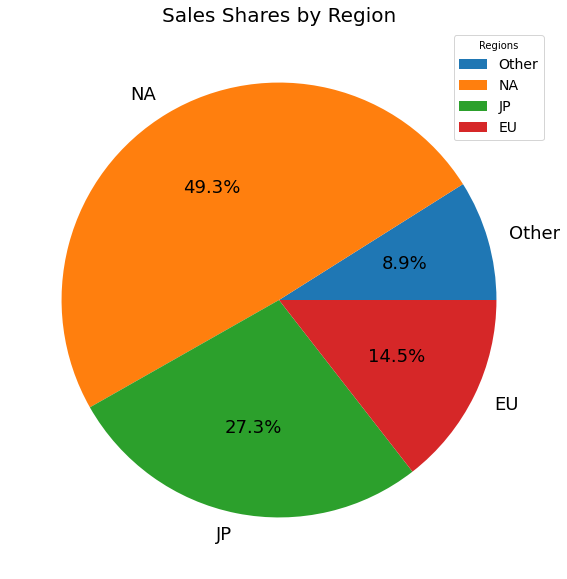

In [86]:
# labels
labels = ['Other', 'NA', 'JP', 'EU',]

sales_shares = np.array([other_shares, NA_shares, EU_shares, JP_shares])

# plotting
plt.figure(figsize=(18,10))
plt.pie(sales_shares, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Sales Shares by Region', fontdict={'fontsize': 20})

# legend
plt.legend(title='Regions', loc='upper right', fontsize='14')

plt.show()

##### Highest Selling Game Per Region

Global (Worldwide)

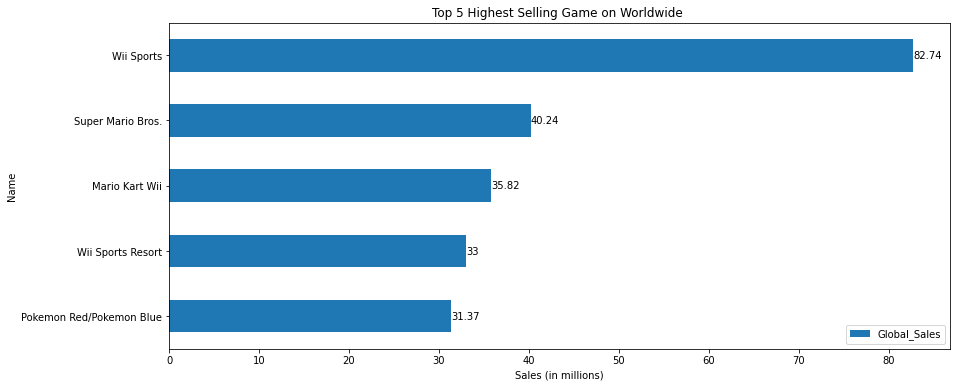

In [93]:
biggest_global_sale = vg.groupby('Global_Sales')['Name'].max().reset_index()
result_global_sale = biggest_global_sale.sort_values(by='Global_Sales', ascending=True).tail(5)

result_global_sale.set_index('Name', inplace=True)
ax = result_global_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game on Worldwide ')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

NA

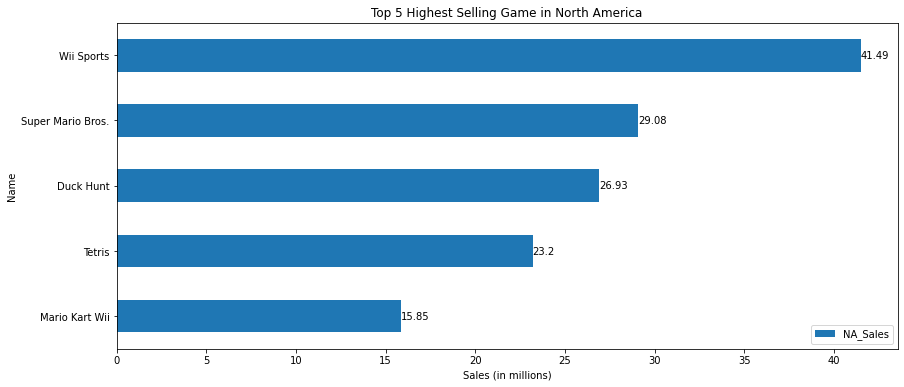

In [98]:
biggest_NA_sale = vg.groupby('NA_Sales')['Name'].max().reset_index()
result_NA_sale = biggest_NA_sale.sort_values(by='NA_Sales', ascending=True).tail(5)

result_NA_sale.set_index('Name', inplace=True)
ax = result_NA_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game in North America')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

JP

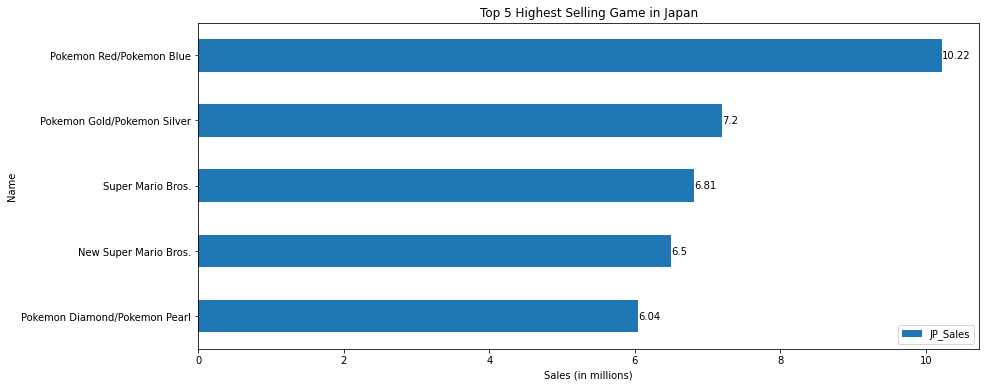

In [97]:
biggest_JP_sale = vg.groupby('JP_Sales')['Name'].max().reset_index()
result_JP_sale = biggest_JP_sale.sort_values(by='JP_Sales', ascending=True).tail(5)

result_JP_sale.set_index('Name', inplace=True)
ax = result_JP_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game in Japan')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

EU

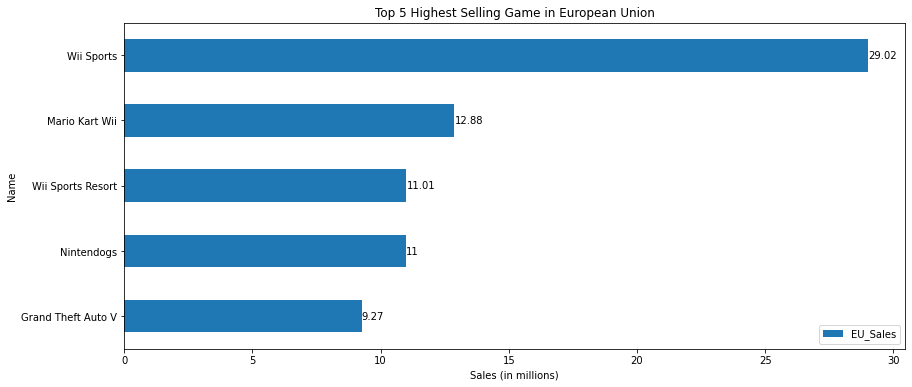

In [99]:
biggest_EU_sale = vg.groupby('EU_Sales')['Name'].max().reset_index()
result_EU_sale = biggest_EU_sale.sort_values(by='EU_Sales', ascending=True).tail(5)

result_EU_sale.set_index('Name', inplace=True)
ax = result_EU_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game in European Union')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

Other (rest of the world)

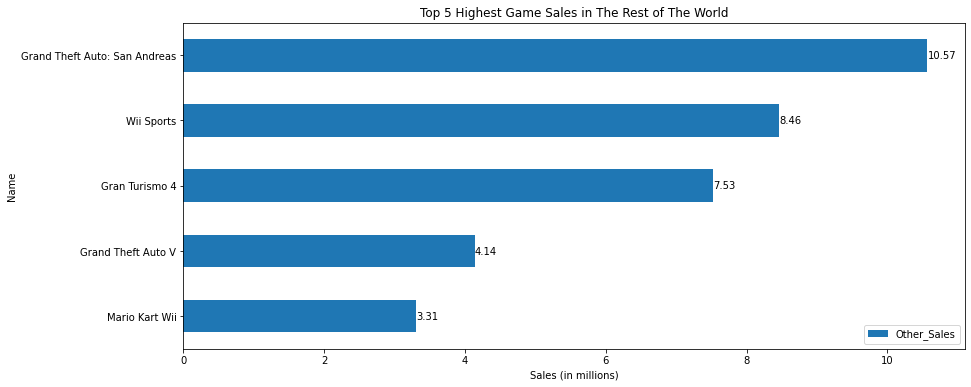

In [101]:
biggest_other_sale = vg.groupby('Other_Sales')['Name'].max().reset_index()
result_other_sale = biggest_other_sale.sort_values(by='Other_Sales', ascending=True).tail(5)

result_other_sale.set_index('Name', inplace=True)
ax = result_other_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Game Sales in The Rest of The World')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

##### Highest Game Sale YoY Per Region

Global (Worldwide)

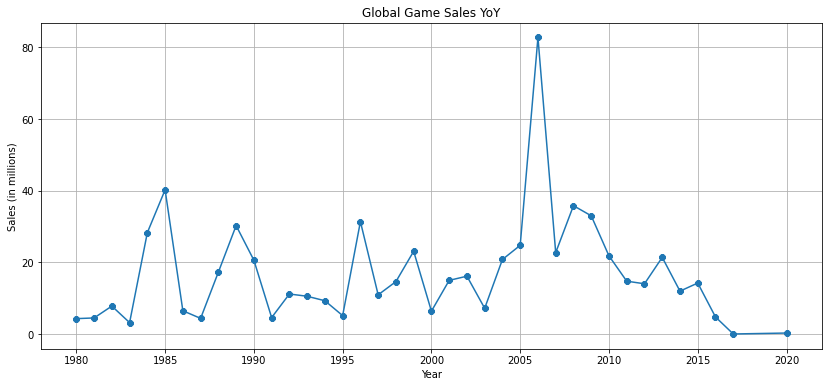

In [107]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['Global_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['Global_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Global Game Sales YoY')

plt.grid(True)

plt.show()

NA

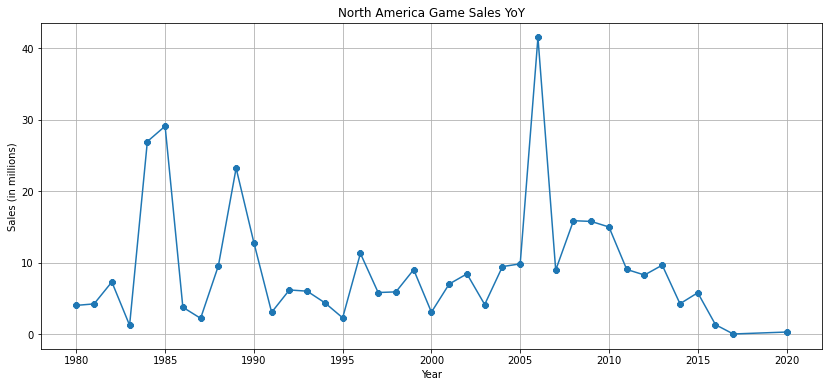

In [106]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['NA_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['NA_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('North America Game Sales YoY')

plt.grid(True)

plt.show()

JP

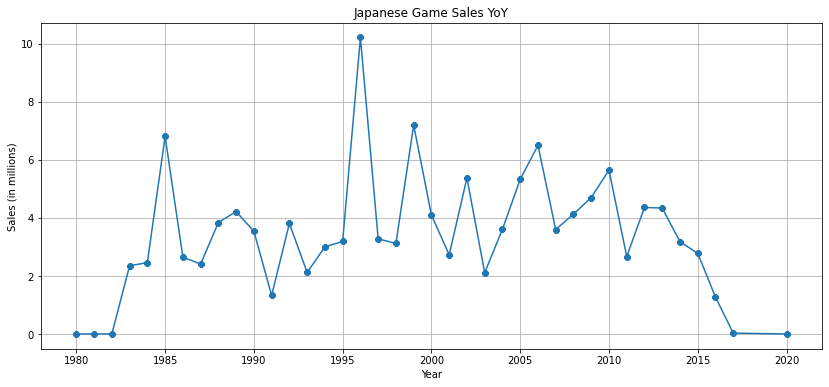

In [105]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['JP_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['JP_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Japanese Game Sales YoY')

plt.grid(True)

plt.show()

EU

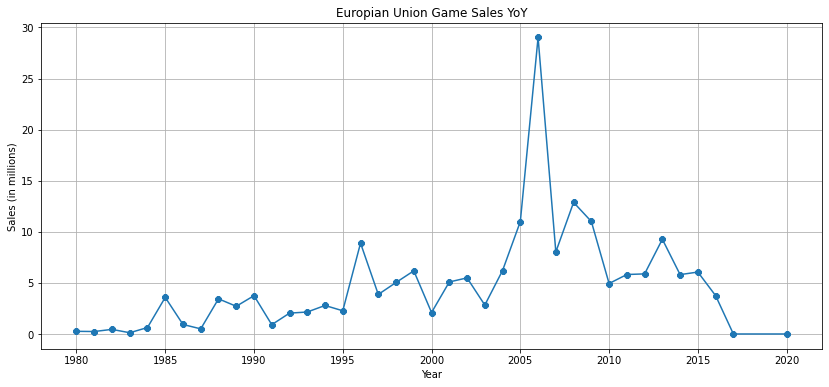

In [103]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['EU_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['EU_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Europian Union Game Sales YoY')

plt.grid(True)

plt.show()

Other (rest of the world)

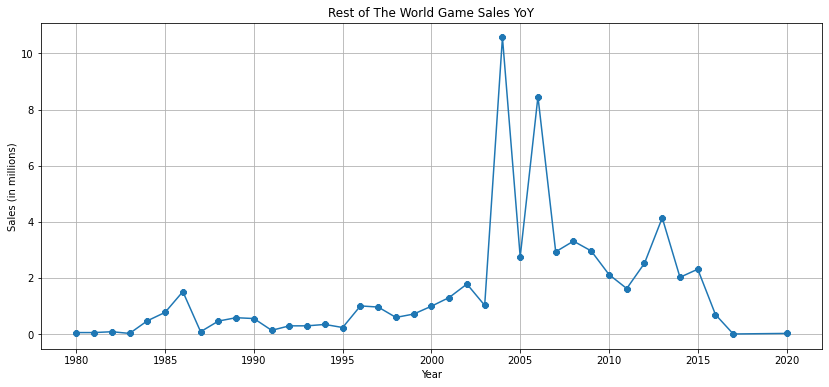

In [104]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['Other_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['Other_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Rest of The World Game Sales YoY')

plt.grid(True)

plt.show()

##### Publisher Sales per Region

Global (worldwide)

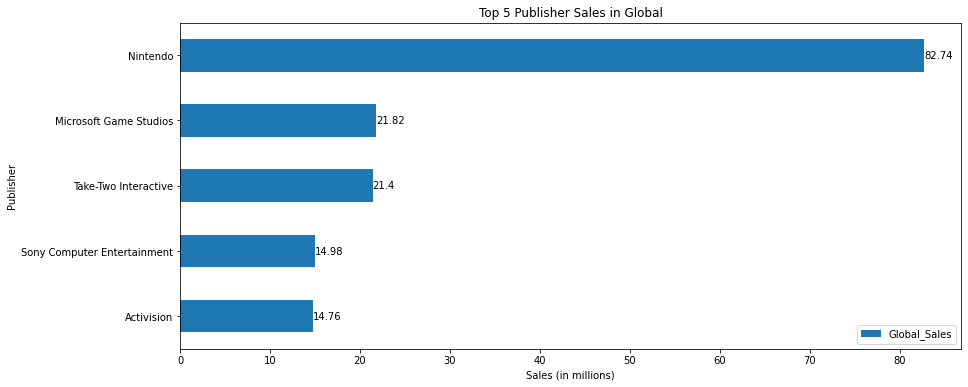

In [45]:
publisher_global_sales = vg.groupby('Publisher')['Global_Sales'].max().reset_index()
sort_publisher_global_sales = publisher_global_sales.sort_values(by='Global_Sales', ascending=True).tail(5)

# plotting
sort_publisher_global_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_global_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in Global')
plt.xlabel('Sales (in millions)')

plt.show()

NA

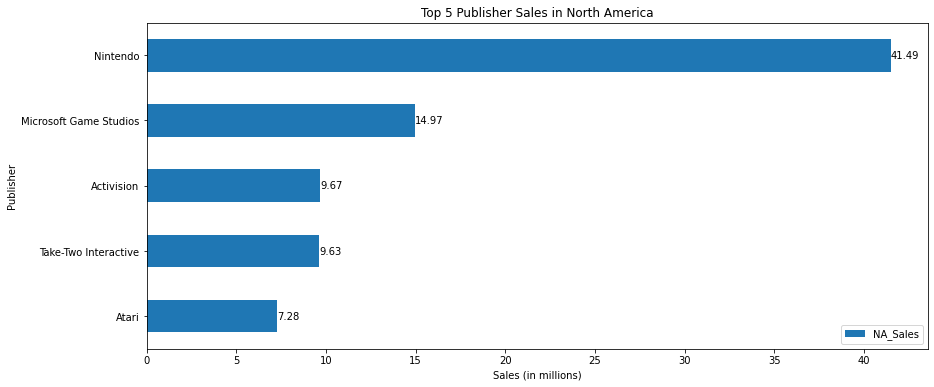

In [46]:
publisher_NA_sales = vg.groupby('Publisher')['NA_Sales'].max().reset_index()
sort_publisher_NA_sales = publisher_NA_sales.sort_values(by='NA_Sales', ascending=True).tail(5)

# plotting
sort_publisher_NA_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_NA_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in North America')
plt.xlabel('Sales (in millions)')

plt.show()

JP

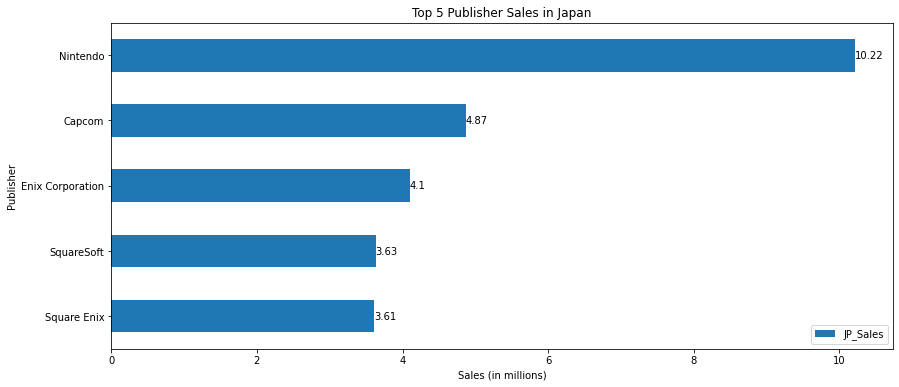

In [48]:
publisher_JP_sales = vg.groupby('Publisher')['JP_Sales'].max().reset_index()
sort_publisher_JP_sales = publisher_JP_sales.sort_values(by='JP_Sales', ascending=True).tail(5)

# plotting
sort_publisher_JP_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_JP_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in Japan')
plt.xlabel('Sales (in millions)')

plt.show()

EU

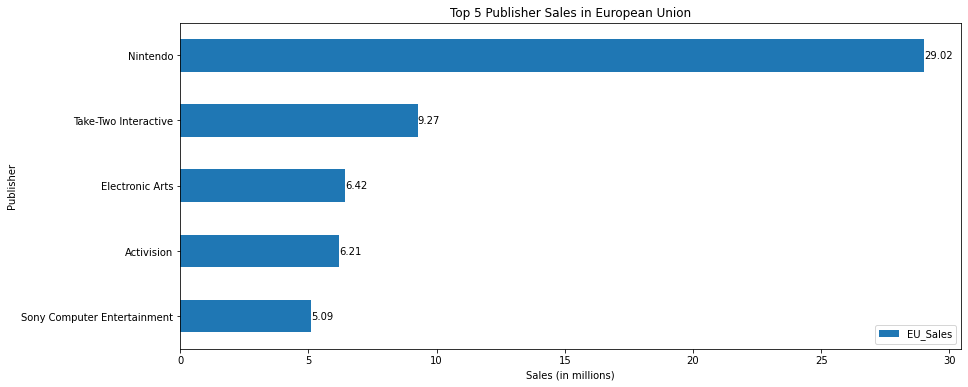

In [49]:
publisher_EU_sales = vg.groupby('Publisher')['EU_Sales'].max().reset_index()
sort_publisher_EU_sales = publisher_EU_sales.sort_values(by='EU_Sales', ascending=True).tail(5)

# plotting
sort_publisher_EU_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_EU_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in European Union')
plt.xlabel('Sales (in millions)')

plt.show()

Other (rest of the world)

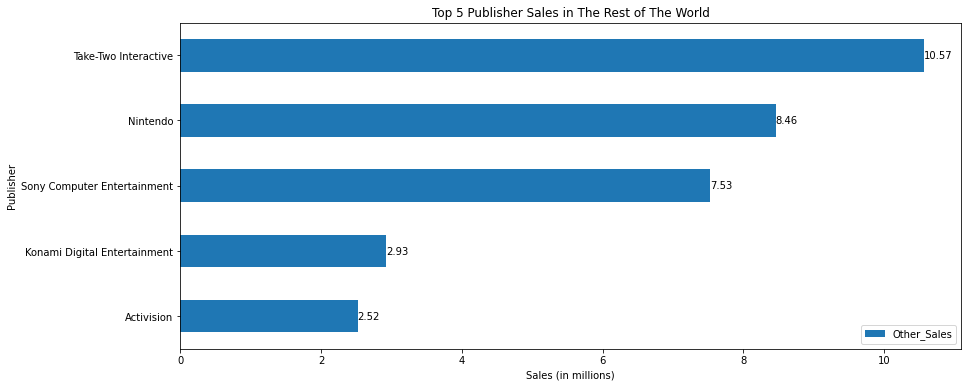

In [110]:
publisher_other_sales = vg.groupby('Publisher')['Other_Sales'].max().reset_index()
sort_publisher_other_sales = publisher_other_sales.sort_values(by='Other_Sales', ascending=True).tail(5)

# plotting
sort_publisher_other_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_other_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in The Rest of The World')
plt.xlabel('Sales (in millions)')

plt.show()

##### Publisher With The Highest Count of Released Title

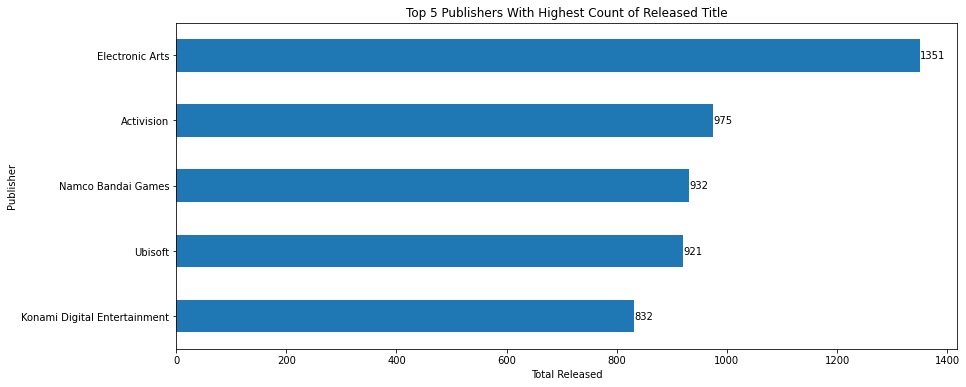

In [51]:
publishers = vg['Publisher'].value_counts()
top_publishers = publishers.head(5).sort_values(ascending=True)
ax = top_publishers.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Publishers With Highest Count of Released Title')
plt.xlabel('Total Released')
plt.ylabel('Publisher')
plt.show()

##### Most Popular Game Genre per Region

Global (worldwide)

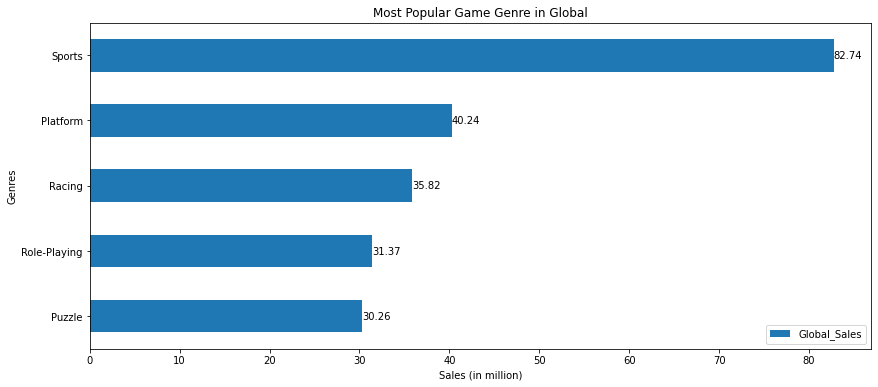

In [59]:
genres_global = vg.groupby('Genre')['Global_Sales'].max().reset_index()
genres_sort_global = genres_global.sort_values(by='Global_Sales', ascending=True).tail(5)

# plotting
genres_sort_global.set_index('Genre', inplace=True)
ax = genres_sort_global.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in Global')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

NA

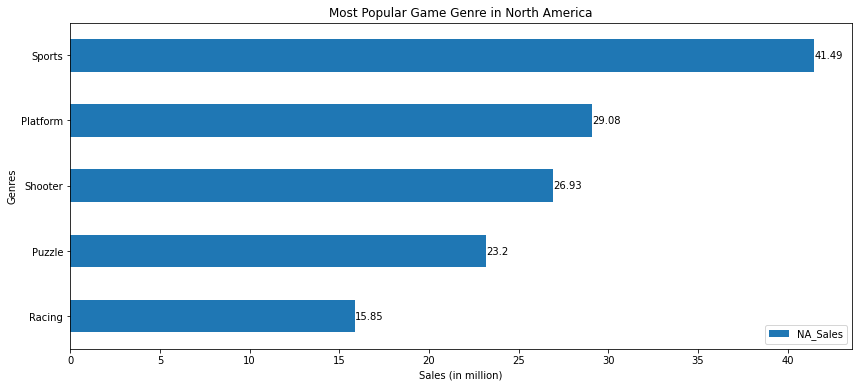

In [58]:
genres_NA = vg.groupby('Genre')['NA_Sales'].max().reset_index()
genres_sort_NA = genres_NA.sort_values(by='NA_Sales', ascending=True).tail(5)

# plotting
genres_sort_NA.set_index('Genre', inplace=True)
ax = genres_sort_NA.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in North America')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

JP

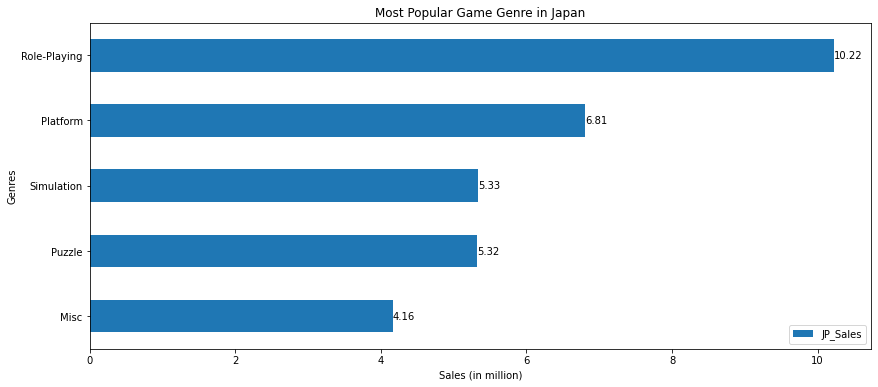

In [61]:
genres_JP = vg.groupby('Genre')['JP_Sales'].max().reset_index()
genres_sort_JP = genres_JP.sort_values(by='JP_Sales', ascending=True).tail(5)

# plotting
genres_sort_JP.set_index('Genre', inplace=True)
ax = genres_sort_JP.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in Japan')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

EU

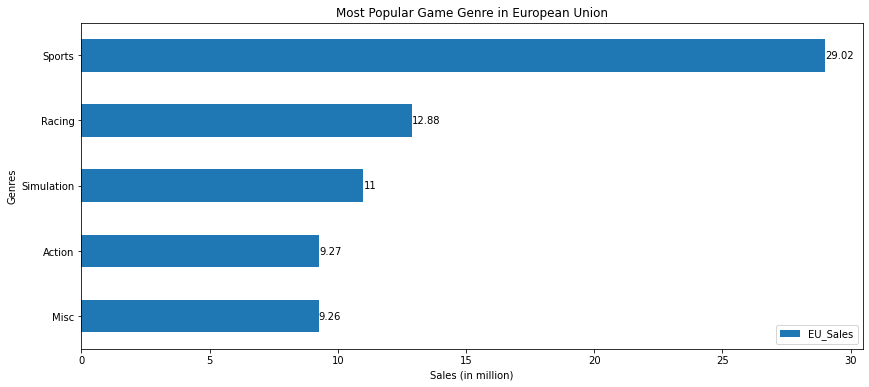

In [62]:
genres_EU = vg.groupby('Genre')['EU_Sales'].max().reset_index()
genres_sort_EU = genres_EU.sort_values(by='EU_Sales', ascending=True).tail(5)

# plotting
genres_sort_EU.set_index('Genre', inplace=True)
ax = genres_sort_EU.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in European Union')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

Other (rest of the world)

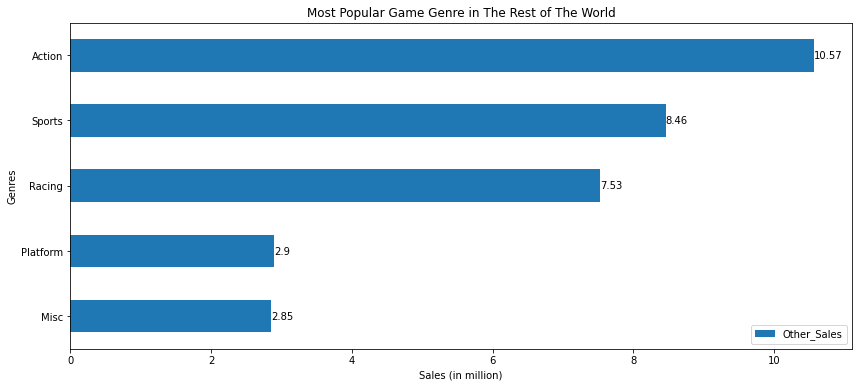

In [111]:
genres_other = vg.groupby('Genre')['Other_Sales'].max().reset_index()
genres_sort_other = genres_other.sort_values(by='Other_Sales', ascending=True).tail(5)

# plotting
genres_sort_other.set_index('Genre', inplace=True)
ax = genres_sort_other.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in The Rest of The World')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

##### Most Popular Game Platform per Released Game

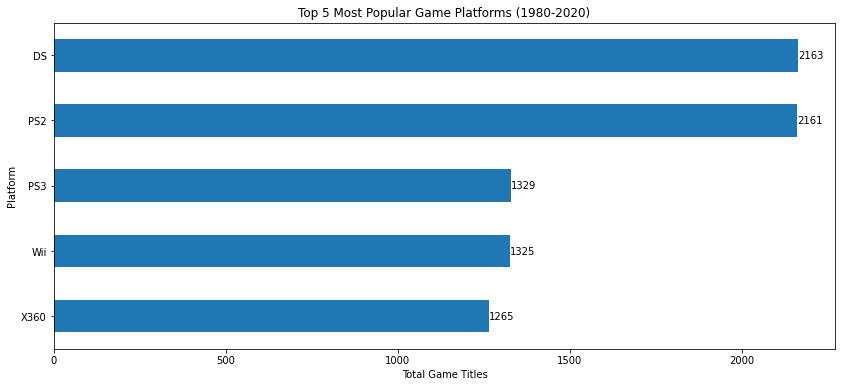

In [73]:
platforms = vg['Platform'].value_counts()
top_platforms = platforms.head(5).sort_values(ascending=True)
ax = top_platforms.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Most Popular Game Platforms (1980-2020)')
plt.xlabel('Total Game Titles')
plt.ylabel('Platform')

plt.show()

#### Summary

Slides link here: